In [16]:
import sys
sys.path.append('../')

import torch
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

from src.dataset import get_dataloaders
from src.model import get_model
from src.transform import get_transforms

In [17]:
input_size = (320, 480)
transforms = get_transforms(input_size)
train_dl, val_dl, test_dl = get_dataloaders("../data", batch_size=1, num_workers=0, transforms=transforms)

def visualize(x, pred, threshold=None):
    x = x.squeeze(0).permute(1, 2, 0).numpy()
    pred = pred.squeeze(0).permute(1, 2, 0).numpy()
    if threshold is not None:
        pred[pred < threshold] = 0
    car = x * pred
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(x)
    axs[1].imshow(pred)
    axs[2].imshow(car)
    plt.show()
    
model = get_model("unet")
model.load_state_dict(torch.load("../output/unet_20230604092756_best174.pth", map_location="cpu")['model_state_dict'])
model.eval()

UNet(
  (encoder1): Sequential(
    (enc1_conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc1_norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1_relu1): ReLU(inplace=True)
    (enc1_conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc1_norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1_relu2): ReLU(inplace=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (encoder2): Sequential(
    (enc2_conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc2_norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc2_relu1): ReLU(inplace=True)
    (enc2_conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc2_norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affin

/home/nsombekke/mambaforge/envs/dl/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


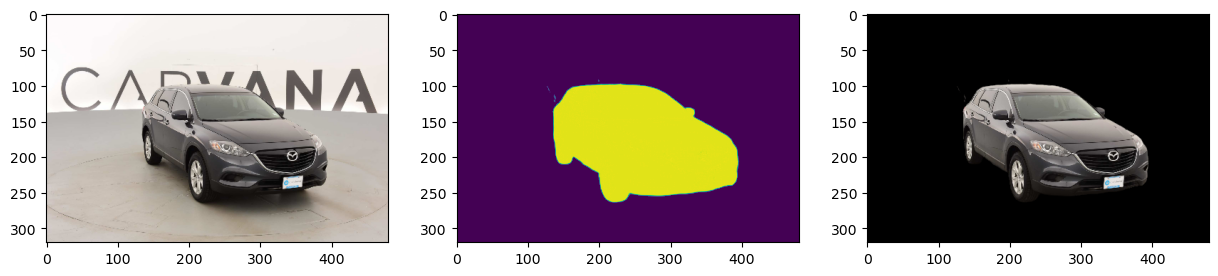

In [18]:
x = test_dl.dataset[191]
with torch.no_grad():
    pred = model(x.unsqueeze(0))
visualize(x, pred, threshold=0.2)

In [52]:
X = [test_dl.dataset[i] for i in range(176, 192)]

import matplotlib.animation as animation
from IPython.display import HTML

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

frames = []
for i in range(len(X)):
    x = X[i]
    with torch.no_grad():
        pred = model(x.unsqueeze(0))
    pred[pred < 0.2] = 0
    pred = torch.clamp(pred, 0, 1)
    car = x * pred
    x_img = axs[0].imshow(x.squeeze(0).permute(1, 2, 0).numpy())
    pred_img = axs[1].imshow(pred.squeeze(0).permute(1, 2, 0).numpy())
    car_img = axs[2].imshow(car.squeeze(0).permute(1, 2, 0).numpy())
    frames.append([x_img, pred_img, car_img])
    
    
ani = animation.ArtistAnimation(fig, frames, interval=100, blit=True,
                                repeat_delay=1000)

plt.tight_layout()
HTML(ani.to_html5_video())

/home/nsombekke/mambaforge/envs/dl/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


<IPython.core.display.Javascript object>